In [2]:
BEIJING,CHANGCHUN,URUMUQI,WUHAN,GUANGZHOU,SHENZHEN,BANGKOK,SHANGHAI,NEWYORK ="""
BEIJING CHANGCHUN URUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK 
""".split()


In [8]:
print(BEIJING)

BEIJING


In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    URUMUQI:   [BEIJING],
    BEIJING:   [URUMUQI,CHANGCHUN,WUHAN,SHENZHEN, NEWYORK],
    NEWYORK:   [BEIJING,SHANGHAI],
    SHANGHAI:  [NEWYORK,WUHAN],
    WUHAN:     [SHANGHAI,BEIJING,GUANGZHOU],
    GUANGZHOU: [WUHAN,BANGKOK],
    SHENZHEN:  [WUHAN,BANGKOK],
    BANGKOK:   [SHENZHEN,GUANGZHOU]
}


In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
graph = connection

In [7]:
g = nx.Graph(graph)

d:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


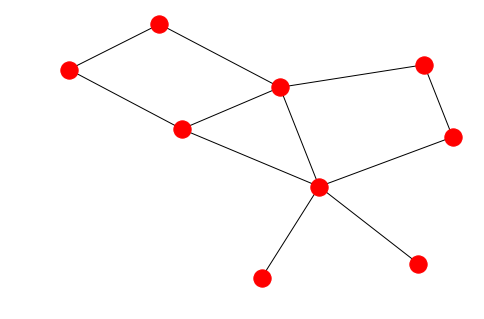

In [8]:
nx.draw(g)

In [9]:
def nagivator_bfs(start,destination,connection_graph):
    pathes = [start]
    seen = set()
    
    while(pathes):
        
        frontier = pathes.pop(0)
        if frontier in seen: continue
        print('I am standing at:{}'.format(frontier))
        
        successor = connection_graph[frontier]
        print('\t---- I am looking forward:{}'.format(successor))
        pathes += successor
        seen.add(frontier)

In [10]:
nagivator_bfs(CHANGCHUN,BEIJING,connection)

I am standing at:CHANGCHUN
	---- I am looking forward:['BEIJING']
I am standing at:BEIJING
	---- I am looking forward:['URUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
I am standing at:URUMUQI
	---- I am looking forward:['BEIJING']
I am standing at:WUHAN
	---- I am looking forward:['SHANGHAI', 'BEIJING', 'GUANGZHOU']
I am standing at:SHENZHEN
	---- I am looking forward:['WUHAN', 'BANGKOK']
I am standing at:NEWYORK
	---- I am looking forward:['BEIJING', 'SHANGHAI']
I am standing at:SHANGHAI
	---- I am looking forward:['NEWYORK', 'WUHAN']
I am standing at:GUANGZHOU
	---- I am looking forward:['WUHAN', 'BANGKOK']
I am standing at:BANGKOK
	---- I am looking forward:['SHENZHEN', 'GUANGZHOU']


In [11]:
def nagivator_dfs(start,destination,connection_graph):
    pathes = [start]
    seen = set()
    
    while pathes:
        frontier = pathes.pop(0)
        if frontier in seen:continue
        print('I am standing at {}'.format(frontier))
        successors = connection_graph[frontier]
        print('\t---- I am looking forward {}'.format(successors))
        
        pathes = successors + pathes
        seen.add(frontier)

In [12]:
nagivator_dfs(CHANGCHUN,BEIJING,connection)

I am standing at CHANGCHUN
	---- I am looking forward ['BEIJING']
I am standing at BEIJING
	---- I am looking forward ['URUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
I am standing at URUMUQI
	---- I am looking forward ['BEIJING']
I am standing at WUHAN
	---- I am looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
I am standing at SHANGHAI
	---- I am looking forward ['NEWYORK', 'WUHAN']
I am standing at NEWYORK
	---- I am looking forward ['BEIJING', 'SHANGHAI']
I am standing at GUANGZHOU
	---- I am looking forward ['WUHAN', 'BANGKOK']
I am standing at BANGKOK
	---- I am looking forward ['SHENZHEN', 'GUANGZHOU']
I am standing at SHENZHEN
	---- I am looking forward ['WUHAN', 'BANGKOK']


In [47]:
def nagivator(start,destination,connection_graph):
    pathes = [[start]]    
    seen =set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in seen: continue
        print('I am standing at:{}'.format(frontier))
        
        successors = connection_graph[frontier]
        
        for s in successors:
            print('\t ----I am look forward:{}'.format(s))
            if s == destination:
                path.append(s)
                return path
            else:
                pathes.append(path + [s])
        
        pathes = sorted(pathes,key=len)
        seen.add(frontier)
        #how?

In [48]:
nagivator(CHANGCHUN,BANGKOK,connection)

I am standing at:CHANGCHUN
	 ----I am look forward:BEIJING
I am standing at:BEIJING
	 ----I am look forward:URUMUQI
	 ----I am look forward:CHANGCHUN
	 ----I am look forward:WUHAN
	 ----I am look forward:SHENZHEN
	 ----I am look forward:NEWYORK
I am standing at:URUMUQI
	 ----I am look forward:BEIJING
I am standing at:WUHAN
	 ----I am look forward:SHANGHAI
	 ----I am look forward:BEIJING
	 ----I am look forward:GUANGZHOU
I am standing at:SHENZHEN
	 ----I am look forward:WUHAN
	 ----I am look forward:BANGKOK


['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [24]:
#stop at  02:48:20

In [13]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

d:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


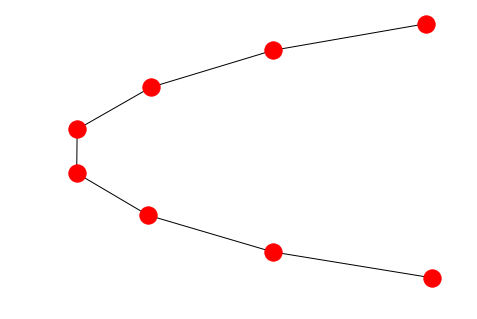

In [14]:
nx.draw(nx.Graph(connection_2))

In [15]:
nagivator_bfs(0,7,connection_2)

I am standing at:0
	---- I am looking forward:[1, 5]
I am standing at:1
	---- I am looking forward:[0, 2]
I am standing at:5
	---- I am looking forward:[0, 6]
I am standing at:2
	---- I am looking forward:[1, 3]
I am standing at:6
	---- I am looking forward:[5, 7]
I am standing at:3
	---- I am looking forward:[2, 4]
I am standing at:7
	---- I am looking forward:[6]
I am standing at:4
	---- I am looking forward:[3]


In [16]:
nagivator_dfs(0,7,connection_2)

I am standing at 0
	---- I am looking forward [1, 5]
I am standing at 1
	---- I am looking forward [0, 2]
I am standing at 2
	---- I am looking forward [1, 3]
I am standing at 3
	---- I am looking forward [2, 4]
I am standing at 4
	---- I am looking forward [3]
I am standing at 5
	---- I am looking forward [0, 6]
I am standing at 6
	---- I am looking forward [5, 7]
I am standing at 7
	---- I am looking forward [6]


In [27]:
help(str.join)

Help on method_descriptor:

join(self, iterable, /)
    Concatenate any number of strings.
    
    The string whose method is called is inserted in between each given string.
    The result is returned as a new string.
    
    Example: '.'.join(['ab', 'pq', 'rs']) -> 'ab.pq.rs'



In [23]:
def draw_route(routes):
    print('🛫->'.join(routes))
#???

In [42]:
ret = nagivator(CHANGCHUN,BANGKOK,connection)
print(ret)
draw_route(ret)

I am standing at:CHANGCHUN
	 ----I am look forward:BEIJING
I am standing at:BEIJING
	 ----I am look forward:URUMUQI
	 ----I am look forward:CHANGCHUN
	 ----I am look forward:WUHAN
	 ----I am look forward:SHENZHEN
	 ----I am look forward:NEWYORK
I am standing at:URUMUQI
	 ----I am look forward:BEIJING
I am standing at:WUHAN
	 ----I am look forward:SHANGHAI
	 ----I am look forward:BEIJING
	 ----I am look forward:GUANGZHOU
I am standing at:SHENZHEN
	 ----I am look forward:WUHAN
	 ----I am look forward:BANGKOK
['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']
CHANGCHUN🛫->BEIJING🛫->SHENZHEN🛫->BANGKOK


In [3]:

decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [4]:
grammar = """
stmt = if block else block
block = cmp; assigment
assgiment = XXX
XXX
"""

In [5]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [6]:
import random

In [8]:
def pare_grammar(grammar_str,sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line:
            continue
        target,rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar
    

In [9]:
g = pare_grammar(grammar)

In [12]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [13]:
def gene(grammar_parsed,target='sentence'):
    if target not in grammar_parsed:
        return target
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed,target = r) for r in rule if  r !='null'  )

In [17]:
gene(g)

'一个小小的女人看见一个小小的小小的蓝色的篮球'

In [18]:
for x in range(30):
    print(gene(pare_grammar(decimal_grammar,sep='='),target = 'expression'))

89/4-0-6
1-8*7*8
0*4*5-0
0*2/2+4
5-1-6-2
1*6-5-0
7/6/4+8
7/6*6*5
8*4*1-7
0/96+1-7
6-8+6*9
4+6+9*5
9*4*5/3
3*53+7*12
1/8/1-1
4*5-2*8
7-3+0+6
6/7/5/2
4+0*6*2
8/8-5-8
4*1+4-6
3+7*4/1
7+6/5/2
7+949+2/7
8/3+5*48
4-72+70-4
1-5/9-26
6*5*7+9
5-8*9*3
9+6-8/0
